# Task: 1

In [1]:
#Import these libraries: Geopandas, Pandas and Matplotlip.pyplot
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

#import warnings
# Ignore specific warnings
#warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#read dataset for Urban Population

df_urban = pd.read_csv('API_SP.URB.TOTL_DS2_en_csv_v2_12209.csv', skiprows=4)
df_urban.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Urban population,SP.URB.TOTL,27728.0,28330.0,28764.0,29157.0,29505.0,29802.0,...,44588.0,44943.0,45297.0,45648.0,45999.0,46351.0,46574.0,46734.0,46891.0,NaN
1,Africa Eastern and Southern,AFE,Urban population,SP.URB.TOTL,19033821.0,19872354.0,20770791.0,21737424.0,22773061.0,23870852.0,...,198073453.0,206556403.0,215083441.0,223732229.0,232922327.0,242451140.0,252315481.0,262377061.0,272666107.0,NaN
2,Afghanistan,AFG,Urban population,SP.URB.TOTL,724373.0,763336.0,805062.0,849446.0,896820.0,947332.0,...,8043935.0,8371880.0,8665979.0,8999963.0,9353296.0,9727157.0,10142913.0,10551772.0,10946834.0,NaN
3,Africa Western and Central,AFW,Urban population,SP.URB.TOTL,14301917.0,14986610.0,15707826.0,16480638.0,17302426.0,18177351.0,...,175773257.0,183117253.0,190684610.0,198494008.0,206492202.0,214684207.0,223107995.0,231704052.0,240494466.0,NaN
4,Angola,AGO,Urban population,SP.URB.TOTL,559023.0,587555.0,618618.0,650924.0,684074.0,717302.0,...,17017877.0,17845914.0,18702478.0,19586972.0,20488542.0,21410634.0,22338586.0,23276246.0,24229338.0,NaN


In [3]:
#read dataset for Total Population
df_total_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_79.csv', skiprows=4)
df_total_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [4]:
# List of datasets available in GeoPandas
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [5]:
# Load the 'naturalearth_lowres' dataset from GeoPandas datasets
n_e = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# 'worlds' is now a GeoDataFrame containing the loaded geospatial dataset
n_e.head()

C:\Users\fatima\AppData\Local\Temp\ipykernel_13016\614848076.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  n_e = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
n_e1 = n_e[['iso_a3', 'geometry']]
n_e1.head()

,iso_a3,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


# Task: 1 Visualisation and Analytics of Geospatial Data

In [7]:
# Merge urban population data with natural earth data on ISO country codes to filterout the country codes

gdf_total_urban_both = n_e1.merge(df_urban, left_on="iso_a3", right_on="Country Code", how='left', suffixes=('_natural_earth', '_urban_pop'))
gdf_total_urban_both = gdf_total_urban_both.merge(df_total_pop, left_on="iso_a3", right_on="Country Code", how='left', suffixes=('_urban_pop', '_total_pop'))
gdf_total_urban_both.head()

,iso_a3,geometry,Country Name_urban_pop,Country Code_urban_pop,Indicator Name_urban_pop,Indicator Code_urban_pop,1960_urban_pop,1961_urban_pop,1962_urban_pop,1963_urban_pop,...,2014_total_pop,2015_total_pop,2016_total_pop,2017_total_pop,2018_total_pop,2019_total_pop,2020_total_pop,2021_total_pop,2022_total_pop,Unnamed: 67_total_pop
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,Urban population,SP.URB.TOTL,119270.0,125388.0,131828.0,138608.0,...,915560.0,917200.0,918371.0,919019.0,918996.0,918465.0,920422.0,924610.0,929766.0,NaN
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,Urban population,SP.URB.TOTL,526827.0,557626.0,590457.0,625168.0,...,50814552.0,52542823.0,54401802.0,56267032.0,58090443.0,59872579.0,61704518.0,63588334.0,65497748.0,NaN
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,Urban population,SP.URB.TOTL,12368380.0,12729040.0,13121753.0,13522659.0,...,35437435.0,35702908.0,36109487.0,36545236.0,37065084.0,37601230.0,38007166.0,38226498.0,38929902.0,NaN
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,Urban population,SP.URB.TOTL,126462473.0,129276215.0,131988693.0,134615404.0,...,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,331511512.0,332031554.0,333287557.0,NaN


In [8]:
# Remove rows where 'Country Code' for urban population data is missing to ensure data completeness.
gdf_total_urban_both_filtered = gdf_total_urban_both.dropna(subset=['Country Code_urban_pop'])

# Display the first few rows of the filtered GeoDataFrame.
gdf_total_urban_both_filtered.head()

,iso_a3,geometry,Country Name_urban_pop,Country Code_urban_pop,Indicator Name_urban_pop,Indicator Code_urban_pop,1960_urban_pop,1961_urban_pop,1962_urban_pop,1963_urban_pop,...,2014_total_pop,2015_total_pop,2016_total_pop,2017_total_pop,2018_total_pop,2019_total_pop,2020_total_pop,2021_total_pop,2022_total_pop,Unnamed: 67_total_pop
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,Urban population,SP.URB.TOTL,119270.0,125388.0,131828.0,138608.0,...,915560.0,917200.0,918371.0,919019.0,918996.0,918465.0,920422.0,924610.0,929766.0,NaN
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,Urban population,SP.URB.TOTL,526827.0,557626.0,590457.0,625168.0,...,50814552.0,52542823.0,54401802.0,56267032.0,58090443.0,59872579.0,61704518.0,63588334.0,65497748.0,NaN
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,Urban population,SP.URB.TOTL,12368380.0,12729040.0,13121753.0,13522659.0,...,35437435.0,35702908.0,36109487.0,36545236.0,37065084.0,37601230.0,38007166.0,38226498.0,38929902.0,NaN
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,Urban population,SP.URB.TOTL,126462473.0,129276215.0,131988693.0,134615404.0,...,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,331511512.0,332031554.0,333287557.0,NaN
5,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KAZ,Urban population,SP.URB.TOTL,4118937.0,4313202.0,4511216.0,4712058.0,...,17288285.0,17542806.0,17794055.0,18037776.0,18276452.0,18513673.0,18755666.0,19000988.0,19621972.0,NaN


# Task 1.1 Choropleth Maps of Global Urban Population: 2001 and 2021

I will create choropleth maps to visualize global urban population changes in 2001 and 2021 using GeoPandas. I will ensure the process, from data import to plotting, is clearly documented and reproducible. 

In [9]:
# Select relevant columns for urban population and geometry for the years 2001, 2020, and 2021.
# The year 2020 is also selected for Task 1.2.
urban_years_columns = gdf_total_urban_both[['Country Code_urban_pop', 'geometry', '2001_urban_pop','2020_urban_pop', '2021_urban_pop',
                                 '2020_total_pop']]
urban_years_columns.head()

,Country Code_urban_pop,geometry,2001_urban_pop,2020_urban_pop,2021_urban_pop,2020_total_pop
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",406358.0,526914.0,533870.0,920422.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",8029877.0,21736651.0,22862550.0,61704518.0
2,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",24757782.0,30999405.0,31213082.0,38007166.0
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",225792302.0,274040676.0,275164510.0,331511512.0


In [10]:
# checking for missing values in Urban Dataframe
gdf_total_urban_both_filtered.isna().sum()

iso_a3                        0
geometry                      0
Country Name_urban_pop        0
Country Code_urban_pop        0
Indicator Name_urban_pop      0
                           ... 
2019_total_pop                0
2020_total_pop                0
2021_total_pop                0
2022_total_pop                0
Unnamed: 67_total_pop       169
Length: 138, dtype: int64

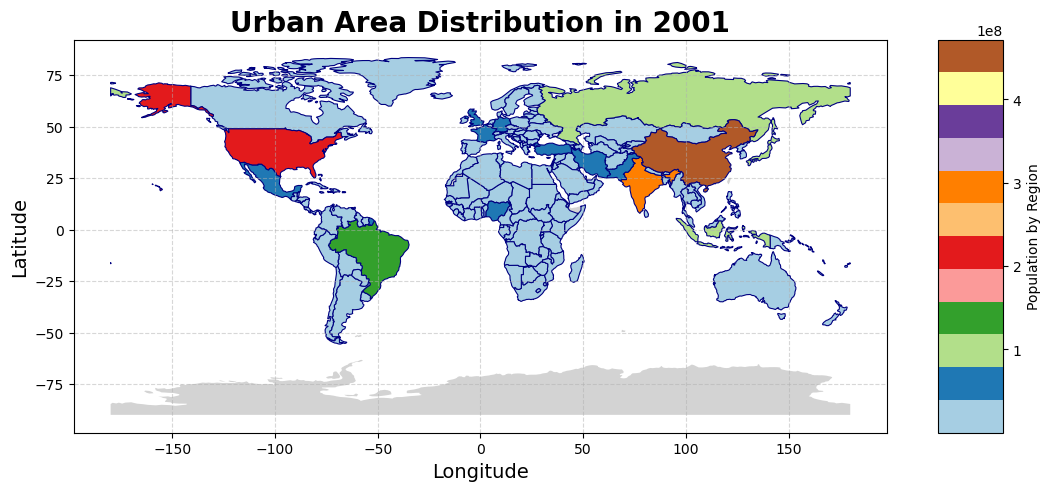

In [11]:
# Assuming gdf is your GeoDataFrame with geometries
fig, ax = plt.subplots(figsize=(12, 6))
n_e1.plot(ax=ax, color="#d3d3d3")

ax.set_facecolor('white')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="8%", pad=0.5)
urban_years_columns.plot(column='2001_urban_pop', ax=ax, legend=True, cmap='Paired', edgecolor='navy', linewidth=0.8,
         legend_kwds={'label': "Population by Region", 'orientation': "vertical"}, cax=cax)

# Customize the plot
ax.set_title('Urban Area Distribution in 2001', fontsize=20, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Add grid
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()
#plot_color_gradients('Qualitative',
                     #['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      #'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      #'tab20c'])


The map shows that China, in brown, had the highest urban population in 2001. India, in orange, had the second highest, and the United States, in red, had the third highest. Countries in blue, like those in Western Europe and parts of Asia, had moderate to high urban populations, with darker blue meaning higher populations.

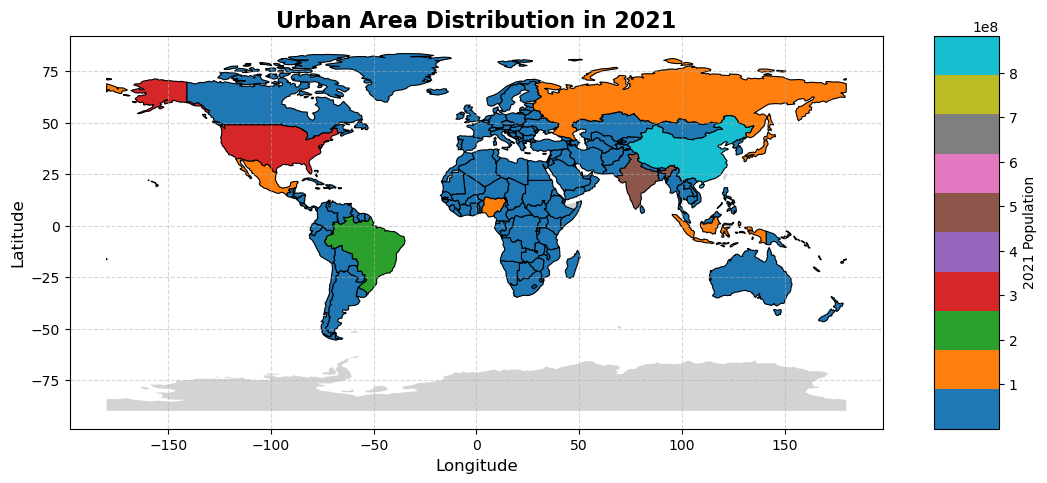

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
n_e1.plot(ax=ax, color="#d3d3d3")

ax.set_facecolor('white')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="8%", pad=0.5)

urban_years_columns.plot(column='2021_urban_pop', ax=ax, legend=True, cmap='tab10', edgecolor='black', linewidth=0.8,
                         legend_kwds={'label': "2021 Population", 'orientation': "vertical"}, cax=cax)

# Customize the plot
ax.set_title('Urban Area Distribution in 2021', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

The map shows that in 2021, China (Light Blue) has the highest urban population, followed by India (Brown) and the United States (red). Brazil (green) and Russia (Orange) also have substantial urban populations. Western European countries and parts of Southeast Asia have high urban populations, shown in darker blue.

# Task 1.2 Analysis of geospatial datasets

### Task 1.2.1 Choropleth Map: 2020 Urban Population for Countries with Populations ≤ 67,326,569

In [13]:
# Filter urban population data for countries with a total population less than or equal to 67,326,569 in 2020

gdf_u1_2_1 = urban_years_columns[urban_years_columns['2020_total_pop'] <=67326569]
gdf_u1_2_1.head()

,Country Code_urban_pop,geometry,2001_urban_pop,2020_urban_pop,2021_urban_pop,2020_total_pop
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",406358.0,526914.0,533870.0,920422.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",8029877.0,21736651.0,22862550.0,61704518.0
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",24757782.0,30999405.0,31213082.0,38007166.0
5,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",8346075.0,10816580.0,10986561.0,18755666.0
6,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",11634932.0,17258430.0,17606637.0,34232050.0


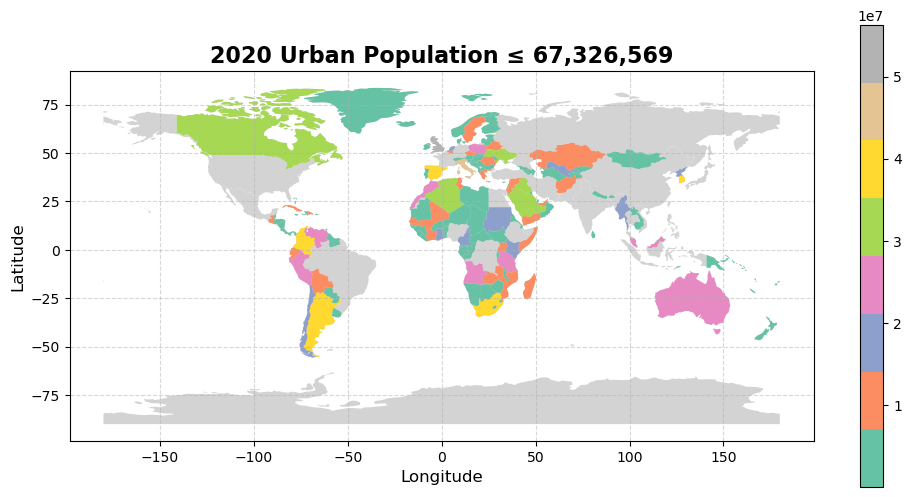

In [14]:
# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the base layer; assuming 'n_e1' is another GeoDataFrame intended as a background
n_e1.plot(ax=ax, color="#d3d3d3")

# Plotting the main GeoDataFrame 'gdf_u1_2_1' with urban population data
gdf_u1_2_1.plot(ax=ax, column='2020_urban_pop', legend=True, cmap='Set2')  # Added a colormap for clarity

# Customize the plot
ax.set_title('2020 Urban Population ≤ 67,326,569', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()


The latitude and longitude are given as (Lat, Lon).

The United Kingdom (50, 0) is shown in a darker shade of gray, indicating the highest urban population in the current filter. Canada (60, -100) is shown in green, representing the second highest urban population. African countries show various levels of urban populations.

### Task 1.2.2 Choropleth Map: 2020 Urban Population for Countries with Populations ≥ 331,000,000

In [15]:
# Filter urban population data for countries with a total population greater than or equal to 331,000,000 in 2020

gdf_u1_2_2 = urban_years_columns[urban_years_columns['2020_total_pop'] >= 331000000]
gdf_u1_2_2.head()

,Country Code_urban_pop,geometry,2001_urban_pop,2020_urban_pop,2021_urban_pop,2020_total_pop
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",225792302.0,274040676.0,275164510.0,3.315115e+08
98,IND,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",301227098.0,487702168.0,498179071.0,1.396387e+09
139,CHN,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",471767321.0,866810508.0,882894483.0,1.411100e+09


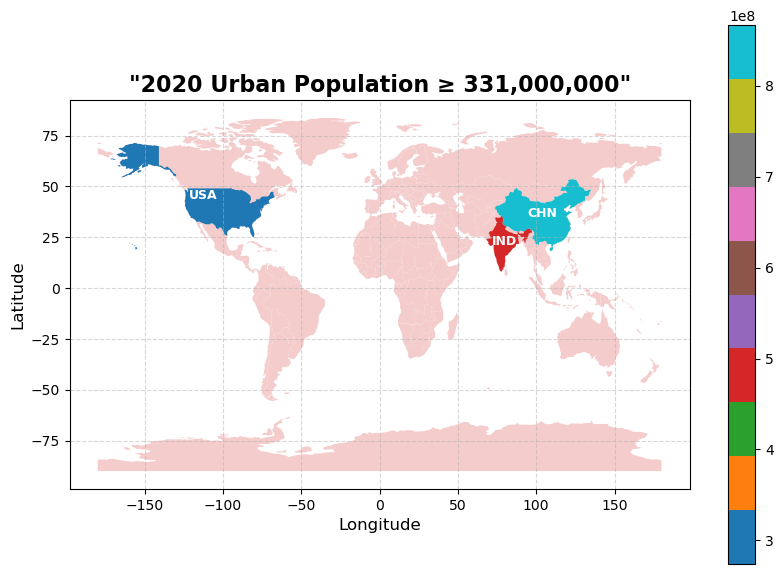

In [16]:
# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(10, 7))

# Plotting the base layer; assuming 'n_e1' is another GeoDataFrame intended as a background
n_e1.plot(ax=ax, color="#f4cccc")
# Plotting the main GeoDataFrame 'gdf_u1_2_1' with urban population data
gdf_u1_2_2.plot(ax=ax, column='2020_urban_pop', legend=True, cmap='tab10')  # Added a colormap for clarity

# Adding country names
for idx, row in gdf_u1_2_2.iterrows():
    # Place text at the centroid of each country
    ax.annotate(text=row['Country Code_urban_pop'], 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=9,  # Smaller font size to avoid clutter
                color='white',  # White text for better readability against dark background
                fontweight='bold')  # Bold text for clarity

# Customize the plot
ax.set_title('"2020 Urban Population ≥ 331,000,000"', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()


Applying this filter, only three countries meet the criteria: China, India, and the USA. China, represented as CHN in blue, has the highest urban population at approximately 0.1 billion. India follows with an urban population of nearly 0.5 billion, and the USA, also shown in blue, has an urban population of around 0.3 billion.

### Task 1.2.3 Choropleth Map of 2020 Urban Population for Countries with Populations Between 10,260,000 and 1,393,400,000

In [17]:
# Filter urban population data for countries with a total population between 10,260,000 and 1,393,400,000 in 2020
gdf_u1_2_3 = urban_years_columns[(urban_years_columns['2020_total_pop'] >= 10260000)
                                 & (urban_years_columns['2020_total_pop'] <= 1393400000)]

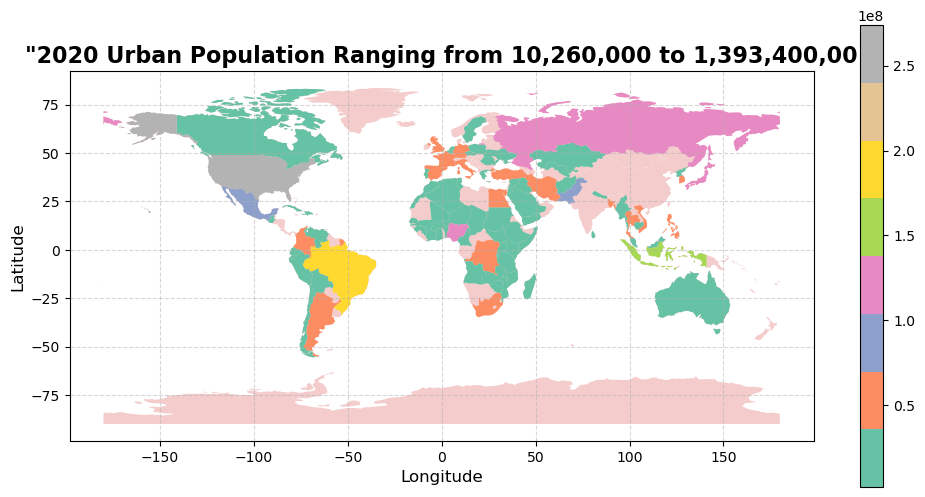

In [18]:
# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the base layer; assuming 'n_e1' is another GeoDataFrame intended as a background
n_e1.plot(ax=ax, color="#f4cccc")
# Plotting the main GeoDataFrame 'gdf_u1_2_1' with urban population data
gdf_u1_2_3.plot(ax=ax, column='2020_urban_pop', legend=True, cmap='Set2')  # Added a colormap for clarity

# Customize the plot
ax.set_title('"2020 Urban Population Ranging from 10,260,000 to 1,393,400,00', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

When you apply the filter, the USA has the highest population, shown in a dark gray shade. Adjacent to the USA, Canada (-100, 50) is represented in green, indicating the lowest population, along with Australia (130, -25) which shares the same shade. African countries display a range of urban populations, spanning from green to pink shades, indicating low to mid urban populations. Russia, nearly in the middle of the filter, has an urban population of around 0.125 million.

### Task 1.2.4 Plotting the Percentage Change in Urban Population from 2001 to 2021 for the Country with the Highest Population in 2020


In [19]:
# Find the row with the highest total population in 2020

gdf_1_2_4_hp = gdf_total_urban_both.loc[gdf_total_urban_both['2020_total_pop'].idxmax()]
gdf_1_2_4_hp

iso_a3                                                                    CHN
geometry                    MULTIPOLYGON (((109.47520958866365 18.19770091...
Country Name_urban_pop                                                  China
Country Code_urban_pop                                                    CHN
Indicator Name_urban_pop                                     Urban population
                                                  ...                        
2019_total_pop                                                   1407745000.0
2020_total_pop                                                   1411100000.0
2021_total_pop                                                   1412360000.0
2022_total_pop                                                   1412175000.0
Unnamed: 67_total_pop                                                     NaN
Name: 139, Length: 138, dtype: object

In [20]:
# Select urban population data from 2000 to 2021 for the country with the highest total population in 2020

gdf_1_2_4_hp_sc = gdf_1_2_4_hp.loc['2000_urban_pop': '2021_urban_pop'] # Hp= Highest population # sc= selected columns
gdf_1_2_4_hp_sc

2000_urban_pop    452999147.0
2001_urban_pop    471767321.0
2002_urban_pop    491993700.0
2003_urban_pop    512473984.0
2004_urban_pop    533257098.0
2005_urban_pop    554367818.0
2006_urban_pop    575118254.0
2007_urban_pop    595670841.0
2008_urban_pop    616481190.0
2009_urban_pop    637407288.0
2010_urban_pop    658498663.0
2011_urban_pop    679390629.0
2012_urban_pop    700996454.0
2013_urban_pop    722694421.0
2014_urban_pop    744357517.0
2015_urban_pop    765822300.0
2016_urban_pop    787376534.0
2017_urban_pop    809246214.0
2018_urban_pop    829760595.0
2019_urban_pop    848982855.0
2020_urban_pop    866810508.0
2021_urban_pop    882894483.0
Name: 139, dtype: object

In [21]:
#Calculate the percentage change in urban population from the previous year and convert it to a percentage
gdf_1_2_4 = gdf_1_2_4_hp_sc.pct_change()
gdf_1_2_4 *= 100
# Drop the first row (2000_urban_pop) since it doesn't have a previous year to compare to
gdf_1_2_4.drop(index=['2000_urban_pop'], inplace=True)
gdf_1_2_4.head()

2001_urban_pop    4.143093
2002_urban_pop    4.287363
2003_urban_pop    4.162713
2004_urban_pop    4.055448
2005_urban_pop    3.958826
Name: 139, dtype: float64

In [22]:
# Create a list of years by removing the '_urban_pop' suffix from the index
years = [index.replace('_urban_pop', '') for index in gdf_1_2_4.index]

# Create a DataFrame with years and their corresponding percentage change values
percentagechange_1_2_4 = pd.DataFrame({'Years': years, 'Values': gdf_1_2_4.values})
percentagechange_1_2_4.head()

,Years,Values
0,2001,4.143093
1,2002,4.287363
2,2003,4.162713
3,2004,4.055448
4,2005,3.958826


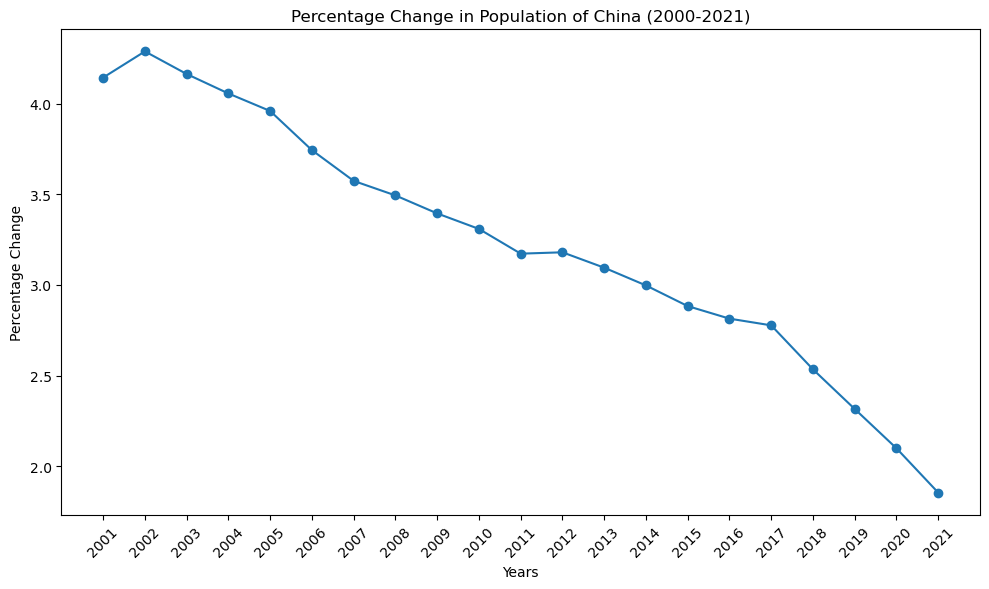

In [23]:
years = list(percentagechange_1_2_4['Years'])  # Use the index of pop_percentage_change directly

plt.figure(figsize=(10, 6))
plt.plot(years, percentagechange_1_2_4['Values'], marker='o', linestyle='-')
plt.title('Percentage Change in Population of China (2000-2021)')
plt.xlabel('Years')
plt.ylabel('Percentage Change')
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()
# gdf_1_2_4.plot(marker='o', linestyle='-')

<p> The line graph shows that China's urban population growth has been decreasing over the years. It starts at about 4.0% in 2002 and drops to just above 1.8% by 2021. There are two exceptions, in 2002 and 2012, where the growth rate goes up. From 2017 onwards, the decline becomes steeper. <p>

### Task 1.2.5 Create a scatter plot comparing the average total population of each country with the average urban population from 2001 to 2021.

In [24]:
# filtering the selected columns for this task
df_selected_pop_years = gdf_total_urban_both_filtered.loc[:, ['Country Code_urban_pop'] + [str(year)+"_urban_pop" for year in range(2001, 2022)]]
gdf_urban_125 = df_selected_pop_years.set_index(['Country Code_urban_pop'])
gdf_urban_125 

,2001_urban_pop,2002_urban_pop,2003_urban_pop,2004_urban_pop,2005_urban_pop,2006_urban_pop,2007_urban_pop,2008_urban_pop,2009_urban_pop,2010_urban_pop,...,2012_urban_pop,2013_urban_pop,2014_urban_pop,2015_urban_pop,2016_urban_pop,2017_urban_pop,2018_urban_pop,2019_urban_pop,2020_urban_pop,2021_urban_pop
Country Code_urban_pop,,,,,,,,,,,,,,,,,,,,,
FJI,406358.0,413829.0,421300.0,428832.0,436333.0,443873.0,451176.0,458642.0,465636.0,472236.0,...,484647.0,490579.0,496380.0,501947.0,507262.0,512280.0,516917.0,521229.0,526914.0,533870.0
TZA,8029877.0,8377308.0,8814911.0,9292156.0,9798745.0,10334400.0,10896766.0,11479108.0,12061617.0,12682374.0,...,14093565.0,14872630.0,15703729.0,16612464.0,17589735.0,18597942.0,19620628.0,20656040.0,21736651.0,22862550.0
CAN,24757782.0,25052940.0,25304780.0,25566897.0,25834340.0,26126316.0,26441461.0,26789863.0,27158023.0,27522537.0,...,28166078.0,28479640.0,28781576.0,29011826.0,29357013.0,29729549.0,30175056.0,30638234.0,30999405.0,31213082.0
USA,225792302.0,228400290.0,230876596.0,233532722.0,236200507.0,238999326.0,241795278.0,244607104.0,247276259.0,249849720.0,...,254614421.0,256953576.0,259430732.0,261950744.0,264473000.0,266788716.0,268844029.0,270737596.0,274040676.0,275164510.0
KAZ,8346075.0,8357267.0,8396312.0,8465822.0,8552467.0,8654579.0,8765446.0,8942684.0,9133481.0,9275230.0,...,9566957.0,9718100.0,9874723.0,10032906.0,10189588.0,10342139.0,10495801.0,10652767.0,10816580.0,10986561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MKD,1187130.0,1174317.0,1173927.0,1173001.0,1171843.0,1170744.0,1170224.0,1170314.0,1171282.0,1173181.0,...,1177371.0,1180399.0,1184330.0,1188475.0,1192987.0,1197983.0,1203438.0,1208802.0,1212058.0,1213985.0
SRB,3976219.0,3989274.0,3997403.0,4004805.0,4009310.0,4010029.0,4010264.0,4009546.0,4009752.0,4009779.0,...,3985121.0,3973872.0,3963388.0,3951845.0,3939250.0,3927608.0,3916682.0,3907389.0,3894281.0,3871714.0
MNE,361755.0,369361.0,376961.0,381058.0,383698.0,386254.0,388857.0,391621.0,394521.0,397301.0,...,402174.0,404636.0,407105.0,409418.0,411597.0,413735.0,415729.0,417692.0,419307.0,419986.0


In [25]:
# Here we have done mean (urban population)
gdf_urban_mean = gdf_urban_125.mean(axis=1)
gdf_urban_mean

Country Code_urban_pop
FJI    4.747042e+05
TZA    1.416572e+07
CAN    2.785496e+07
USA    2.515493e+08
KAZ    9.475549e+06
           ...     
MKD    1.184336e+06
SRB    3.969135e+06
MNE    3.977401e+05
TTO    7.709636e+05
SSD    1.732288e+06
Length: 169, dtype: float64

In [26]:
# filtering the selected columns for this task
df_selected_pop_years = gdf_total_urban_both_filtered.loc[:, ['Country Code_total_pop'] + [str(year)+"_total_pop" for year in range(2001, 2022)]]
gdf_pop_125 = df_selected_pop_years.set_index(['Country Code_total_pop'])
gdf_pop_125 

,2001_total_pop,2002_total_pop,2003_total_pop,2004_total_pop,2005_total_pop,2006_total_pop,2007_total_pop,2008_total_pop,2009_total_pop,2010_total_pop,...,2012_total_pop,2013_total_pop,2014_total_pop,2015_total_pop,2016_total_pop,2017_total_pop,2018_total_pop,2019_total_pop,2020_total_pop,2021_total_pop
Country Code_total_pop,,,,,,,,,,,,,,,,,,,,,
FJI,841320.0,849891.0,858306.0,866694.0,874923.0,883083.0,890648.0,896731.0,901383.0,905169.0,...,911059.0,913453.0,915560.0,917200.0,918371.0,919019.0,918996.0,918465.0,920422.0,924610.0
TZA,35414469.0,36353531.0,37333918.0,38360879.0,39439505.0,40562052.0,41716497.0,42870884.0,43957933.0,45110527.0,...,47786137.0,49253643.0,50814552.0,52542823.0,54401802.0,56267032.0,58090443.0,59872579.0,61704518.0,63588334.0
CAN,31020902.0,31360079.0,31644028.0,31940655.0,32243753.0,32571174.0,32889025.0,33247118.0,33628895.0,34004889.0,...,34714222.0,35082954.0,35437435.0,35702908.0,36109487.0,36545236.0,37065084.0,37601230.0,38007166.0,38226498.0
USA,284968955.0,287625193.0,290107933.0,292805298.0,295516599.0,298379912.0,301231207.0,304093966.0,306771529.0,309327143.0,...,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,331511512.0,332031554.0
KAZ,14858335.0,14858948.0,14909019.0,15012984.0,15147029.0,15308085.0,15484192.0,15776938.0,16092822.0,16321872.0,...,16792090.0,17035551.0,17288285.0,17542806.0,17794055.0,18037776.0,18276452.0,18513673.0,18755666.0,19000988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MKD,2034882.0,2020157.0,2026773.0,2032544.0,2036855.0,2040228.0,2043559.0,2046898.0,2050671.0,2055004.0,...,2061044.0,2064032.0,2067471.0,2070226.0,2072490.0,2074502.0,2076217.0,2076694.0,2072531.0,2065092.0
SRB,7503433.0,7496522.0,7480591.0,7463157.0,7440769.0,7411569.0,7381579.0,7350222.0,7320807.0,7291436.0,...,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7020858.0,6982604.0,6945235.0,6899126.0,6834326.0
MNE,607389.0,609828.0,612267.0,613353.0,614261.0,615025.0,615875.0,616969.0,618294.0,619428.0,...,620601.0,621207.0,621810.0,622159.0,622303.0,622373.0,622227.0,622028.0,621306.0,619211.0


In [27]:
# Here we have done mean (total population)
gdf_pop_125_mean = gdf_pop_125.mean(axis=1)
gdf_pop_125_mean

Country Code_total_pop
FJI    8.977932e+05
TZA    4.770753e+07
CAN    3.444677e+07
USA    3.103990e+08
KAZ    1.663642e+07
           ...     
MKD    2.054591e+06
SRB    7.223992e+06
MNE    6.179997e+05
TTO    1.426322e+06
SSD    9.411792e+06
Length: 169, dtype: float64

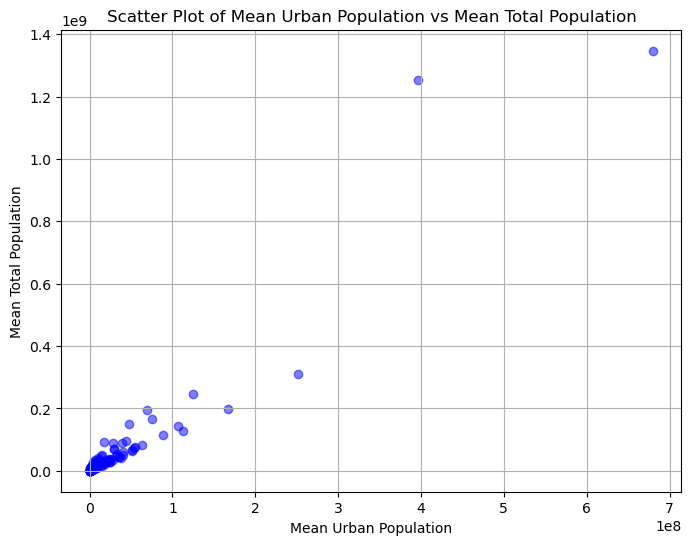

In [28]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(gdf_urban_mean, gdf_pop_125_mean, color='blue', alpha=0.5)
plt.title('Scatter Plot of Mean Urban Population vs Mean Total Population')
plt.xlabel('Mean Urban Population')
plt.ylabel('Mean Total Population')
plt.grid(True)
plt.show()

The mean population has a direct correlation with the total population. This means that whenever the total population increases, the urban population increases at a similar rate.

# Task 2 Geospatial Sentiment Analysis Using Social Media Data


In [6]:
import plotly.express as px # Importing Plotly Express for data visualization
from textblob import TextBlob # Importing TextBlob for text processing and sentiment analysis
import folium # Importing Folium for map visualization
from folium.plugins import MarkerCluster # Importing MarkerCluster from Folium plugins for clustering markers on the map
from geopy.geocoders import Nominatim # Importing Nominatim from Geopy for geocoding
import re # Importing regular expression library for pattern matching
from geopy.extra.rate_limiter import RateLimiter # Importing RateLimiter from Geopy extra for rate limiting geocoding requests

C:\Users\fatima\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# Loading the dataset of ChatGPT tweets
df_chatgpt_tweets= pd.read_csv("tweets.csv")
df_chatgpt_tweets.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet
0,0,ChatGPT: Optimizing Language Models for Dialog...,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08/04/2009 17:52,405,1692,3247,False,20/12/2020 06:06,Twitter for Android,0,0,False
1,1,"Try talking with ChatGPT, our new AI system wh...",Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21/09/2009 15:27,834,666,178,False,13/12/2020 16:27,Twitter Web App,1,1,False
2,2,ChatGPT: Optimizing Language Models for Dialog...,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25/06/2020 23:30,10,88,155,False,12/12/2020 20:33,Twitter for Android,0,0,False
3,3,"THRILLED to share that ChatGPT, our new model ...",Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10/09/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,Twitter Web App,446,2129,False
4,4,"As of 2 minutes ago, @OpenAI released their ne...",Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,23/04/2020 17:58,152,580,1473,False,12/12/2020 20:17,Twitter for iPhone,0,0,False


# Task 2.1: Data Pre-processing  

In [9]:
df_chatgpt_tweets.shape

(11020, 15)

In [10]:
df_chatgpt_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        11020 non-null  int64 
 1   tweets            11020 non-null  object
 2   user_name         11020 non-null  object
 3   user_location     8750 non-null   object
 4   user_description  10341 non-null  object
 5   user_created      11020 non-null  object
 6   user_followers    11020 non-null  int64 
 7   user_friends      11020 non-null  int64 
 8   user_favourites   11020 non-null  int64 
 9   user_verified     11020 non-null  bool  
 10  date              11020 non-null  object
 11  source            11019 non-null  object
 12  retweets          11020 non-null  int64 
 13  favorites         11020 non-null  int64 
 14  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(7)
memory usage: 1.1+ MB


In [11]:
# Dropping rows with missing values in 'user_location' and 'tweets' columns
df_chatgpt_tweets_cleaned = df_chatgpt_tweets.dropna(subset=['user_location', 'tweets'])
df_chatgpt_tweets_cleaned.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet
0,0,ChatGPT: Optimizing Language Models for Dialog...,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08/04/2009 17:52,405,1692,3247,False,20/12/2020 06:06,Twitter for Android,0,0,False
1,1,"Try talking with ChatGPT, our new AI system wh...",Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21/09/2009 15:27,834,666,178,False,13/12/2020 16:27,Twitter Web App,1,1,False
2,2,ChatGPT: Optimizing Language Models for Dialog...,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25/06/2020 23:30,10,88,155,False,12/12/2020 20:33,Twitter for Android,0,0,False
3,3,"THRILLED to share that ChatGPT, our new model ...",Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10/09/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,Twitter Web App,446,2129,False
5,5,"Just launched ChatGPT, our new AI system which...",Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",26/01/2020 21:43,105,108,106,False,12/12/2020 20:11,Twitter for iPhone,0,0,False


In [12]:
# Selected 700 rows from the cleaned DataFrame
selected_df = df_chatgpt_tweets_cleaned.sample(n=700, random_state=1) 
selected_df.shape

(700, 15)

In [13]:
# Function to clean URLs and special characters from tweets
def clean_tweet_data(text):
    # Remove URLs more thoroughly
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # This covers most URL formats
    # Remove special characters, preserving only letters, numbers, and spaces
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text


In [14]:
# Applying the function to each tweet in the DataFrame
selected_df['cleaned_tweets'] = selected_df['tweets'].apply(clean_tweet_data)

# Display the cleaned data
selected_df.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet,cleaned_tweets
8532,8532,OpenAI ChatGPT knows how to stop students chea...,Hinako Sakuraoka,"Hamburg, Germany",1️⃣Dancer 🦌in the musical LION KING🦁 in Hambur...,27/04/2011 13:52,74,249,345,False,27/05/2021 12:36,IFTTT,0,3,False,OpenAI ChatGPT knows how to stop students chea...
3323,3323,There’s no doubt in my mind that almost all co...,Alen,"California, USA",no such ting in a life that’s better than yours.,19/04/2017 21:45,14,209,393,False,14/01/2021 08:19,Twitter for iPhone,0,0,False,Theres no doubt in my mind that almost all cor...
1760,1760,awesome...just asked #openai #chatgpt a few si...,Rory Reynolds,Dubai/Abu Dhabi,National News Editor at @TheNationalNews. Duba...,18/03/2009 13:11,2325,2587,173,False,29/12/2020 11:11,Twitter Web App,1,3,False,awesomejust asked openai chatgpt a few simple ...
9488,9488,Whoa it’s super success\n\n#ChatGPT https://t....,Nevil,"Toronto, Ontario",infosec | Proud Indian,24/03/2020 05:29,6,16,1,False,01/08/2021 15:25,Twitter for iPhone,0,1,False,Whoa its super successnnChatGPT
1667,1667,"holyyyy, solved my computer networks assignmen...",The National,"Abu Dhabi, UAE","The official Twitter feed of The National, the...",11/02/2009 11:34,1033382,195,3226,True,28/12/2020 20:15,Twitter Media Studio,1,11,False,holyyyy solved my computer networks assignment...


In [15]:
# Displaying the 'tweets' content for the specified index
selected_df.loc[8532]['tweets']

'OpenAI ChatGPT knows how to stop students cheating using ChatGPT https://t.co/RjdhYmbsdO'

In [16]:
# Displaying the 'cleaned_tweets' content for the specified index
selected_df.loc[8532]['cleaned_tweets']

'OpenAI ChatGPT knows how to stop students cheating using ChatGPT '

# # Task 2.2: Geocoding

In [59]:
# Initializing the Nominatim geolocator with a user agent and timeout
geolocator = Nominatim(user_agent="CIS7030" , timeout=10)

def valid_location(loc):
    return loc.strip() != ''
# Creating a rate limiter for the geocode function with a minimum delay of 1 second
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Applying the geocode method to the 'user_location' column to get location details
selected_df['location'] = selected_df['user_location'].apply(geocode)
selected_df['Lat'] = selected_df['location'].apply(lambda x: x.latitude if x else None)
selected_df['Lon'] = selected_df['location'].apply(lambda x: x.longitude if x else None)
selected_df.head()

RateLimiter caught an error, retrying (0/2 tries). Called with (*(' ',), **{}).
Traceback (most recent call last):
  File "C:\Users\fatima\anaconda3\lib\site-packages\geopy\geocoders\base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "C:\Users\fatima\anaconda3\lib\site-packages\geopy\adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "C:\Users\fatima\anaconda3\lib\site-packages\geopy\adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 400

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\fatima\anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "C:\Users\fatima\anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 274, in __call__
    re

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,...,favorites,is_retweet,cleaned_tweets,location,Lat,Lon,sentiment,sentiment_category,subjectivity,subjectivity_category
8532,8532,OpenAI ChatGPT knows how to stop students chea...,Hinako Sakuraoka,"Hamburg, Germany",1️⃣Dancer 🦌in the musical LION KING🦁 in Hambur...,27/04/2011 13:52,74,249,345,False,...,3,False,OpenAI ChatGPT knows how to stop students chea...,"(Hamburg, Deutschland, (53.550341, 10.000654))",53.550341,10.000654,0.000000,Neutral,0.000000,NaN
3323,3323,There’s no doubt in my mind that almost all co...,Alen,"California, USA",no such ting in a life that’s better than yours.,19/04/2017 21:45,14,209,393,False,...,0,False,Theres no doubt in my mind that almost all cor...,"(California, United States, (36.7014631, -118....",36.701463,-118.755997,0.300000,Positive,0.450000,Somewhat Subjective
1760,1760,awesome...just asked #openai #chatgpt a few si...,Rory Reynolds,Dubai/Abu Dhabi,National News Editor at @TheNationalNews. Duba...,18/03/2009 13:11,2325,2587,173,False,...,3,False,awesomejust asked openai chatgpt a few simple ...,"(First Abu Dhabi Bank, طريق أبو بكر الصديق, ال...",25.264478,55.330392,-0.100000,Negative,0.228571,Objective
9488,9488,Whoa it’s super success\n\n#ChatGPT https://t....,Nevil,"Toronto, Ontario",infosec | Proud Indian,24/03/2020 05:29,6,16,1,False,...,1,False,Whoa its super successnnChatGPT,"(Toronto, Golden Horseshoe, Ontario, Canada, (...",43.653482,-79.383935,0.333333,Positive,0.666667,Very Subjective
1667,1667,"holyyyy, solved my computer networks assignmen...",The National,"Abu Dhabi, UAE","The official Twitter feed of The National, the...",11/02/2009 11:34,1033382,195,3226,True,...,11,False,holyyyy solved my computer networks assignment...,"(أبو ظبي, الإمارات العربية المتحدة, (24.453835...",24.453835,54.377401,0.000000,Neutral,0.000000,NaN


In [40]:
# Save the cleaned DataFrame with geocoding results to a tab-separated text file
selected_df.to_csv('geocoding.txt', sep='\t', index=False)

In [20]:
# Read the saved cleaned DataFrame with geocoding results from a tab-separated text file
df_geocoding = pd.read_csv('geocoding.txt', sep='\t')
df_geocoding.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet,cleaned_tweets,location,Lat,Lon
0,8532,OpenAI ChatGPT knows how to stop students chea...,Hinako Sakuraoka,"Hamburg, Germany",1️⃣Dancer 🦌in the musical LION KING🦁 in Hambur...,27/04/2011 13:52,74,249,345,False,27/05/2021 12:36,IFTTT,0,3,False,OpenAI ChatGPT knows how to stop students chea...,"Hamburg, Deutschland",53.550341,10.000654
1,3323,There’s no doubt in my mind that almost all co...,Alen,"California, USA",no such ting in a life that’s better than yours.,19/04/2017 21:45,14,209,393,False,14/01/2021 08:19,Twitter for iPhone,0,0,False,Theres no doubt in my mind that almost all cor...,"California, United States",36.701463,-118.755997
2,1760,awesome...just asked #openai #chatgpt a few si...,Rory Reynolds,Dubai/Abu Dhabi,National News Editor at @TheNationalNews. Duba...,18/03/2009 13:11,2325,2587,173,False,29/12/2020 11:11,Twitter Web App,1,3,False,awesomejust asked openai chatgpt a few simple ...,"First Abu Dhabi Bank, طريق أبو بكر الصديق, الخ...",25.264478,55.330392
3,9488,Whoa it’s super success\n\n#ChatGPT https://t....,Nevil,"Toronto, Ontario",infosec | Proud Indian,24/03/2020 05:29,6,16,1,False,01/08/2021 15:25,Twitter for iPhone,0,1,False,Whoa its super successnnChatGPT,"Toronto, Golden Horseshoe, Ontario, Canada",43.653482,-79.383935
4,1667,"holyyyy, solved my computer networks assignmen...",The National,"Abu Dhabi, UAE","The official Twitter feed of The National, the...",11/02/2009 11:34,1033382,195,3226,True,28/12/2020 20:15,Twitter Media Studio,1,11,False,holyyyy solved my computer networks assignment...,"أبو ظبي, الإمارات العربية المتحدة",24.453835,54.377401


In [21]:
# selected_df_cleaned = selected_df.dropna
selected_df_cleaned = df_geocoding.dropna(subset=['location'])
selected_df_cleaned.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet,cleaned_tweets,location,Lat,Lon
0,8532,OpenAI ChatGPT knows how to stop students chea...,Hinako Sakuraoka,"Hamburg, Germany",1️⃣Dancer 🦌in the musical LION KING🦁 in Hambur...,27/04/2011 13:52,74,249,345,False,27/05/2021 12:36,IFTTT,0,3,False,OpenAI ChatGPT knows how to stop students chea...,"Hamburg, Deutschland",53.550341,10.000654
1,3323,There’s no doubt in my mind that almost all co...,Alen,"California, USA",no such ting in a life that’s better than yours.,19/04/2017 21:45,14,209,393,False,14/01/2021 08:19,Twitter for iPhone,0,0,False,Theres no doubt in my mind that almost all cor...,"California, United States",36.701463,-118.755997
2,1760,awesome...just asked #openai #chatgpt a few si...,Rory Reynolds,Dubai/Abu Dhabi,National News Editor at @TheNationalNews. Duba...,18/03/2009 13:11,2325,2587,173,False,29/12/2020 11:11,Twitter Web App,1,3,False,awesomejust asked openai chatgpt a few simple ...,"First Abu Dhabi Bank, طريق أبو بكر الصديق, الخ...",25.264478,55.330392
3,9488,Whoa it’s super success\n\n#ChatGPT https://t....,Nevil,"Toronto, Ontario",infosec | Proud Indian,24/03/2020 05:29,6,16,1,False,01/08/2021 15:25,Twitter for iPhone,0,1,False,Whoa its super successnnChatGPT,"Toronto, Golden Horseshoe, Ontario, Canada",43.653482,-79.383935
4,1667,"holyyyy, solved my computer networks assignmen...",The National,"Abu Dhabi, UAE","The official Twitter feed of The National, the...",11/02/2009 11:34,1033382,195,3226,True,28/12/2020 20:15,Twitter Media Studio,1,11,False,holyyyy solved my computer networks assignment...,"أبو ظبي, الإمارات العربية المتحدة",24.453835,54.377401


In [22]:
# Selected 500 rows from the cleaned DataFrame
df_geocode_sample = selected_df_cleaned.sample(n=500, random_state=1) 
df_geocode_sample.shape

(500, 19)

## Task 2.3 Polarity Analysis


In [23]:
# Function to calculate the polarity of a given text using TextBlob
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [24]:
# Applying the getTextPolarity function to the 'cleaned_tweets' column to calculate polarity

df_geocode_sample['polarity'] = df_geocode_sample['cleaned_tweets'].apply(getTextPolarity)
df_geocode_sample.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet,cleaned_tweets,location,Lat,Lon,polarity
537,10259,#ChatGPT doing Oxford admission (soon) https:/...,Chamar Ariban,"Pasay City, Philippines","Husband to Nymfa, Furdad for Margaux, former @...",17/03/2010 12:31,86,345,13978,False,28/08/2021 03:42,Twitter for iPhone,0,1,False,ChatGPT doing Oxford admission soon,"DLTBCo Pasay City Bus Depot, Zone 2, District ...",14.553831,120.993548,0.000000
534,8211,I’ll stop sharing these but I also asked ChatG...,Adam Wittek,"London, England",Lecoq-trained Actor | Presenter | Voice-Over A...,22/03/2016 10:58,292,251,844,False,16/05/2021 11:35,Twitter for Android,0,1,False,Ill stop sharing these but I also asked ChatGP...,"London, Greater London, England, United Kingdom",51.489334,-0.144055,0.100000
126,3060,Im impressed!\n\n#OpenAi #ChatGPT @OpenAI http...,Canadian Advocacy Centre 4 Health Safety & Jus...,Canada,#CACHSJ advocates for #civilrights #humanright...,10/09/2020 19:03,606,2050,735,False,11/01/2021 01:20,Twitter Web App,0,1,False,Im impressednnOpenAi ChatGPT OpenAI,Canada,61.066692,-107.991707,0.000000
364,5939,A new post in ’That Was The Week'\nOpenAI’s Ne...,CHEManager International,"Weinheim, Germany",Wiley’s leading media brand providing first-ha...,14/01/2010 07:42,3548,1198,467,False,22/02/2021 07:55,TweetDeck,0,0,False,A new post in That Was The WeeknOpenAIs New Ch...,"Weinheim, Rhein-Neckar-Kreis, Baden-Württember...",49.546235,8.671746,0.305682
14,4188,This is the mind blowing thread I have read al...,Chemist+Druggist,"London, UK","Providing latest pharmacy news - informing, su...",10/02/2009 10:00,19112,1790,7041,True,20/01/2021 15:27,TweetDeck,0,1,False,This is the mind blowing thread I have read al...,"London, Greater London, England, United Kingdom",51.489334,-0.144055,0.285714


Text(0.5, 1.0, 'Histogram of Polarity')

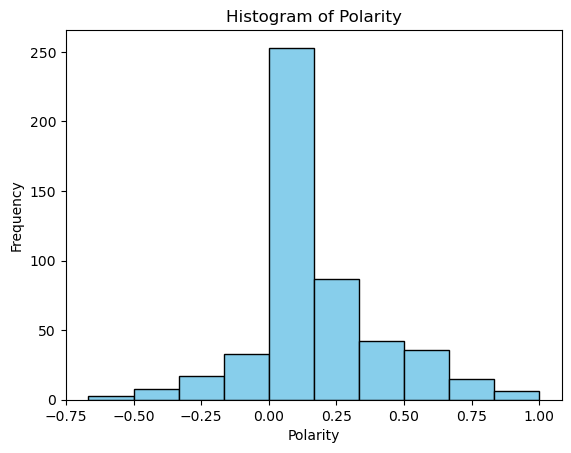

In [26]:
plt.hist(df_geocode_sample['polarity'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Histogram of Polarity')

The histogram of polarity shows the distribution of tweet sentiments about ChatGPT. The majority of tweets have a neutral sentiment (polarity around 0.0), with a noticeable skew towards positive sentiment (polarity greater than 0.0). Fewer tweets exhibit negative sentiment (polarity less than 0.0). This suggests that overall, tweets about ChatGPT tend to be neutral to positive.

In [31]:
# Assuming 'df_geocode_sample' is a DataFrame that includes 'Lat', 'Lon', and 'polarity'
average_polarity = df_geocode_sample.groupby(['Lat', 'Lon']).agg({'polarity': 'mean'}).reset_index()

# Create a map using Folium centered around the average latitude and longitude
m = folium.Map(location=[average_polarity['Lat'].mean(), average_polarity['Lon'].mean()], zoom_start=2)

# Add marker cluster to map
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each location with the average polarity as a popup
for idx, row in average_polarity.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Lon']],
        popup=f'Average Polarity: {row["polarity"]:.2f}',
        icon=folium.Icon(color='green' if row['polarity'] > 0 else 'red')
    ).add_to(marker_cluster)

# Display the map
m

I have calculated the average polarity of tweets for countries and their cities. The interactive map displays the average sentiment polarity of tweets about ChatGPT, analyzed using TextBlob. It employs a MarkerCluster to group markers, visualizing tweet density globally. Each marker indicates a location where tweets were analyzed, with green markers representing positive average polarity (generally positive tweets) and red markers representing negative average polarity (generally negative tweets).

In [32]:
# Assuming selected_df has columns 'Lat', 'Lon', and 'cleaned_tweets'
# Sentiment analysis
selected_df_cleaned['sentiment'] = selected_df_cleaned['cleaned_tweets'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Categorizing sentiment into categories
selected_df_cleaned['sentiment_category'] = pd.cut(selected_df_cleaned['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=["Negative", "Neutral", "Positive"])

# Create map
fig = px.scatter_geo(selected_df_cleaned,
                     lat='Lat',
                     lon='Lon',
                     color='sentiment_category',
                     projection="natural earth",
                     title="Tweet Sentiment Map",
                     hover_name="cleaned_tweets",  # Optionally show the tweet text on hover
                     color_discrete_map={"Negative": "red", "Neutral": "gray", "Positive": "green"})  # Optional color mapping

fig.show()


C:\Users\fatima\AppData\Local\Temp\ipykernel_13016\3254969681.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fatima\AppData\Local\Temp\ipykernel_13016\3254969681.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The "Tweet Sentiment Map" is an interactive visualization that displays the sentiment polarity of tweets about ChatGPT from various global locations. Include a high density of mixed sentiments in North America, particularly in the United States, varied sentiments across Western Europe, and mixed feedback in Asia, especially in India. Australia also shows a range of sentiments, while Africa and South America have fewer but varied sentiment markers. The map effectively highlights regional perceptions of ChatGPT.

# Task 2.4 Subjectivity Analysis

In [33]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [34]:
df_geocode_sample['subjectivity'] = df_geocode_sample['cleaned_tweets'].apply(getTextSubjectivity)
df_geocode_sample.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,...,source,retweets,favorites,is_retweet,cleaned_tweets,location,Lat,Lon,polarity,subjectivity
537,10259,#ChatGPT doing Oxford admission (soon) https:/...,Chamar Ariban,"Pasay City, Philippines","Husband to Nymfa, Furdad for Margaux, former @...",17/03/2010 12:31,86,345,13978,False,...,Twitter for iPhone,0,1,False,ChatGPT doing Oxford admission soon,"DLTBCo Pasay City Bus Depot, Zone 2, District ...",14.553831,120.993548,0.000000,0.000000
534,8211,I’ll stop sharing these but I also asked ChatG...,Adam Wittek,"London, England",Lecoq-trained Actor | Presenter | Voice-Over A...,22/03/2016 10:58,292,251,844,False,...,Twitter for Android,0,1,False,Ill stop sharing these but I also asked ChatGP...,"London, Greater London, England, United Kingdom",51.489334,-0.144055,0.100000,0.800000
126,3060,Im impressed!\n\n#OpenAi #ChatGPT @OpenAI http...,Canadian Advocacy Centre 4 Health Safety & Jus...,Canada,#CACHSJ advocates for #civilrights #humanright...,10/09/2020 19:03,606,2050,735,False,...,Twitter Web App,0,1,False,Im impressednnOpenAi ChatGPT OpenAI,Canada,61.066692,-107.991707,0.000000,0.000000
364,5939,A new post in ’That Was The Week'\nOpenAI’s Ne...,CHEManager International,"Weinheim, Germany",Wiley’s leading media brand providing first-ha...,14/01/2010 07:42,3548,1198,467,False,...,TweetDeck,0,0,False,A new post in That Was The WeeknOpenAIs New Ch...,"Weinheim, Rhein-Neckar-Kreis, Baden-Württember...",49.546235,8.671746,0.305682,0.460606
14,4188,This is the mind blowing thread I have read al...,Chemist+Druggist,"London, UK","Providing latest pharmacy news - informing, su...",10/02/2009 10:00,19112,1790,7041,True,...,TweetDeck,0,1,False,This is the mind blowing thread I have read al...,"London, Greater London, England, United Kingdom",51.489334,-0.144055,0.285714,0.535714


Text(0.5, 1.0, 'Histogram of Subjectivity')

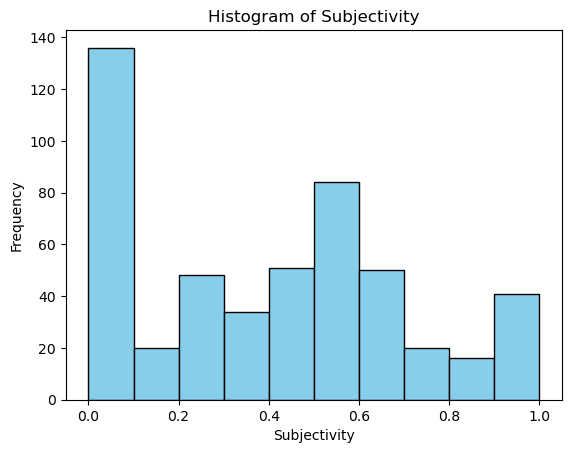

In [35]:
plt.hist(df_geocode_sample['subjectivity'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title('Histogram of Subjectivity')

In [36]:
# Aggregate the average subjectivity by location
average_subjectivity = df_geocode_sample.groupby(['Lat', 'Lon']).agg({'subjectivity': 'mean'}).reset_index()
# Create a map centered around the average coordinates
m_subj = folium.Map(location=[average_subjectivity['Lat'].mean(), average_subjectivity['Lon'].mean()], zoom_start=2)
# Add a marker cluster to manage the markers
marker_cluster_subj = MarkerCluster().add_to(m_subj)
# Loop through each location to add markers with the average subjectivity as popup
for idx, row in average_subjectivity.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Lon']],
        popup=f'Average Subjectivity: {row["subjectivity"]:.2f}',
        icon=folium.Icon(color='blue' if row['subjectivity'] >= 0.5 else 'gray')
    ).add_to(marker_cluster_subj)
# Display the map 
m_subj

The map is designed to provide a clear and visual representation of where higher or lower subjectivity values are concentrated. By examining the distribution of the markers, one can identify regions with notably high or low average subjectivity, which might indicate differing levels of opinion or sentiment intensity in those areas.

In [37]:
# Assuming selected_df has columns 'Lat', 'Lon', and 'cleaned_tweets'

# Subjectivity analysis
selected_df_cleaned['subjectivity'] = selected_df_cleaned['cleaned_tweets'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

# Categorizing subjectivity into categories
# You can define the bins based on how you interpret the subjectivity scale
selected_df_cleaned['subjectivity_category'] = pd.cut(selected_df_cleaned['subjectivity'], bins=[0, 0.33, 0.66, 1], labels=["Objective", "Somewhat Subjective", "Very Subjective"])

# Create map
fig = px.scatter_geo(selected_df_cleaned,
                     lat='Lat',
                     lon='Lon',
                     color='subjectivity_category',
                     projection="natural earth",
                     title="Tweet Subjectivity Map",
                     hover_name="cleaned_tweets",  # Optionally show the tweet text on hover
                     color_discrete_map={"Objective": "blue", "Somewhat Subjective": "yellow", "Very Subjective": "red"})  # Optional color mapping

fig.show()


C:\Users\fatima\AppData\Local\Temp\ipykernel_13016\203943464.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fatima\AppData\Local\Temp\ipykernel_13016\203943464.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This map is used to analyze and understand regional differences in tweet subjectivity, helping to identify areas with varying levels of sentiment intensity. By examining this map, one can identify global patterns in tweet subjectivity and gain insights into how different regions express subjective or objective sentiments on social media.

In [38]:
import geopandas as gpd
import json
import urllib.request
import folium

In [39]:
# Load GeoJSON data directly into a GeoDataFrame
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
countries_gdf = gpd.read_file(url)

# Check the data
print(countries_gdf.head())

    id                  name  \
0  AFG           Afghanistan   
1  AGO                Angola   
2  ALB               Albania   
3  ARE  United Arab Emirates   
4  ARG             Argentina   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...  
2  POLYGON ((20.59025 41.85540, 20.46317 41.51509...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...  


In [40]:
type(countries_gdf)

geopandas.geodataframe.GeoDataFrame

In [41]:
print(countries_gdf)

      id                  name  \
0    AFG           Afghanistan   
1    AGO                Angola   
2    ALB               Albania   
3    ARE  United Arab Emirates   
4    ARG             Argentina   
..   ...                   ...   
175  PSE             West Bank   
176  YEM                 Yemen   
177  ZAF          South Africa   
178  ZMB                Zambia   
179  ZWE              Zimbabwe   

                                              geometry  
0    POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1    MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...  
2    POLYGON ((20.59025 41.85540, 20.46317 41.51509...  
3    POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4    MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...  
..                                                 ...  
175  POLYGON ((35.54566 32.39399, 35.54525 31.78251...  
176  POLYGON ((53.10857 16.65105, 52.38521 16.38241...  
177  POLYGON ((31.52100 -29.25739, 31.32556 -29.401...  
178  POLYGON ((32.759

In [42]:
tweets_gdf = gpd.GeoDataFrame(
    df_geocode_sample,
    geometry=gpd.points_from_xy(df_geocode_sample['Lon'], df_geocode_sample['Lat']),
    crs='EPSG:4326'
)

In [43]:
from shapely.geometry import Point
# Ensure the tweets GeoDataFrame is in WGS 84 coordinate reference system
tweets_gdf.set_crs('EPSG:4326', inplace=True)

# Ensure the countries GeoDataFrame is in the same CRS
if countries_gdf.crs != 'EPSG:4326':
    countries_gdf = countries_gdf.to_crs('EPSG:4326')

In [44]:
# Spatial join tweets to countries
tweets_with_countries = gpd.sjoin(tweets_gdf, countries_gdf, how="inner", predicate='intersects')

# Check the result
print(tweets_with_countries.head())

     Unnamed: 0                                             tweets  \
537       10259  #ChatGPT doing Oxford admission (soon) https:/...   
640        9749  A new post in ’That Was The Week'\n11 business...   
401       11008  ChatGPT very confidently gives incorrect answe...   
156        9199  It's probably time to verify whether human bei...   
409        5618  If you want to portray ChatGPT as smart, you c...   

                user_name                   user_location  \
537         Chamar Ariban         Pasay City, Philippines   
640  Rachel Regala Navela  Quezon City, National Capital    
401              𝙆𝙖𝙮𝙙𝙤𝙣 👀                      Ilocos Sur   
156           Trisha Seña         Quezon City,Philippines   
409  TheFinancialDistrict        Quezon City, Philippines   

                                      user_description      user_created  \
537  Husband to Nymfa, Furdad for Margaux, former @...  17/03/2010 12:31   
640  In God's perfect time 💙\n\nLove dancing 💃Trave...  08/0

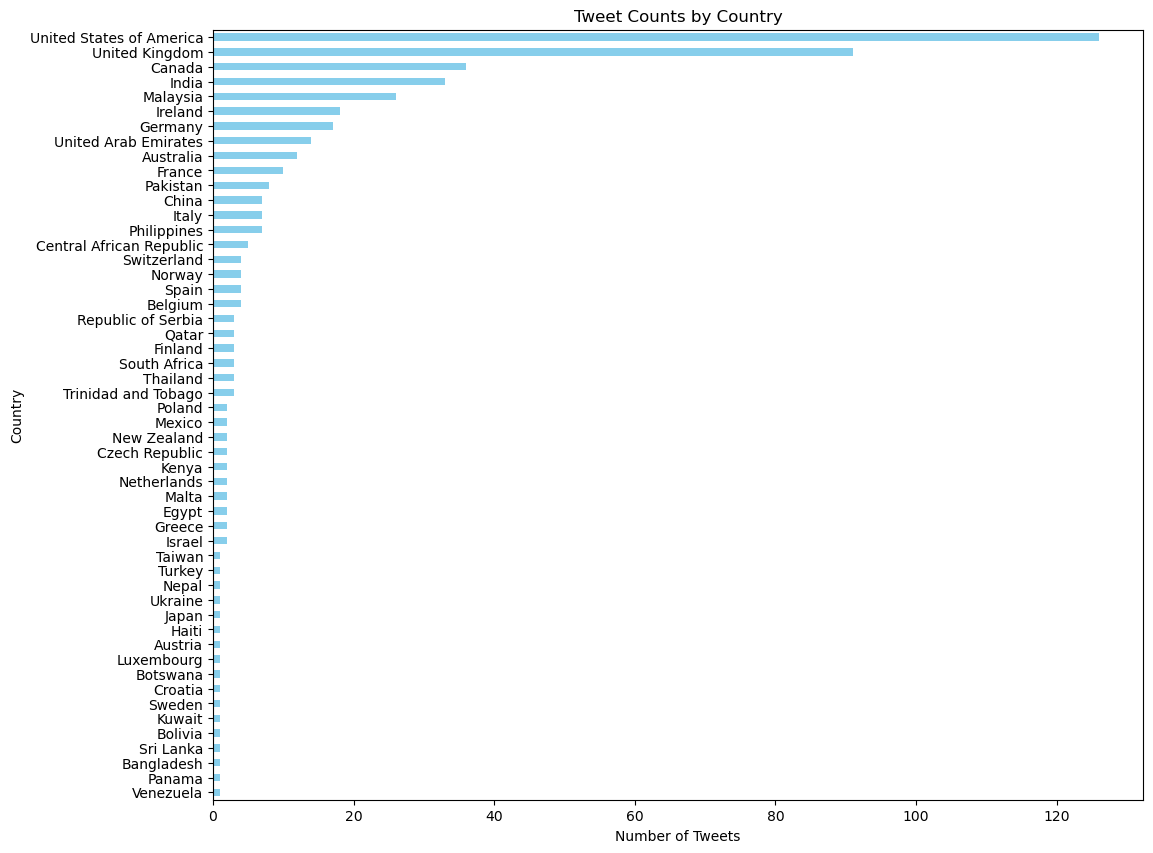

In [45]:
import matplotlib.pyplot as plt

# Count tweets per country
tweet_counts = tweets_with_countries['name'].value_counts()

# Plot
plt.figure(figsize=(12, 10))  # Increase figure size
tweet_counts.sort_values().plot(kind='barh', color='skyblue')  # Horizontal bar chart
plt.title('Tweet Counts by Country')
plt.xlabel('Number of Tweets')
plt.ylabel('Country')
plt.show()

In [46]:
print(tweets_with_countries.columns)

Index(['Unnamed: 0', 'tweets', 'user_name', 'user_location',
       'user_description', 'user_created', 'user_followers', 'user_friends',
       'user_favourites', 'user_verified', 'date', 'source', 'retweets',
       'favorites', 'is_retweet', 'cleaned_tweets', 'location', 'Lat', 'Lon',
       'polarity', 'subjectivity', 'geometry', 'index_right', 'id', 'name'],
      dtype='object')


In [47]:
from textblob import TextBlob

# Assuming 'cleaned_tweets' is the column where the cleaned tweet texts are stored
selected_df_cleaned['polarity'] = selected_df_cleaned['cleaned_tweets'].apply(lambda text: TextBlob(text).sentiment.polarity)
selected_df_cleaned['subjectivity'] = selected_df_cleaned['cleaned_tweets'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

# Confirm the columns have been added
print(selected_df_cleaned[['cleaned_tweets', 'polarity', 'subjectivity']].head())

                                      cleaned_tweets  polarity  subjectivity
0  OpenAI ChatGPT knows how to stop students chea...  0.000000      0.000000
1  Theres no doubt in my mind that almost all cor...  0.300000      0.450000
2  awesomejust asked openai chatgpt a few simple ... -0.100000      0.228571
3                   Whoa its super successnnChatGPT   0.333333      0.666667
4  holyyyy solved my computer networks assignment...  0.000000      0.000000


C:\Users\fatima\AppData\Local\Temp\ipykernel_13016\3749481152.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fatima\AppData\Local\Temp\ipykernel_13016\3749481152.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
# Check columns after join to ensure 'polarity' and 'subjectivity' are still there
#print(tweets_with_countries.columns)

In [49]:
countries_sentiment = tweets_with_countries.groupby('name').agg({
    'polarity': 'mean',
    'subjectivity': 'mean'
}).reset_index()
# Print the result to verify
print(countries_sentiment.head())

         name  polarity  subjectivity
0   Australia  0.199460      0.444937
1     Austria -0.300000      0.400000
2  Bangladesh  0.000000      0.000000
3     Belgium  0.045833      0.187500
4     Bolivia  0.000000      0.000000


In [50]:
sjoin_mean = countries_gdf.merge(countries_sentiment, how="inner")
sjoin_mean.head()

,id,name,geometry,polarity,subjectivity
0,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",0.172897,0.384779
1,AUS,Australia,"MULTIPOLYGON (((145.39798 -40.79255, 146.36412...",0.199460,0.444937
2,AUT,Austria,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",-0.300000,0.400000
3,BEL,Belgium,"POLYGON ((3.31497 51.34578, 4.04707 51.26726, ...",0.045833,0.187500
4,BGD,Bangladesh,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",0.000000,0.000000


Text(80.34722222222221, 0.5, 'Latitude')

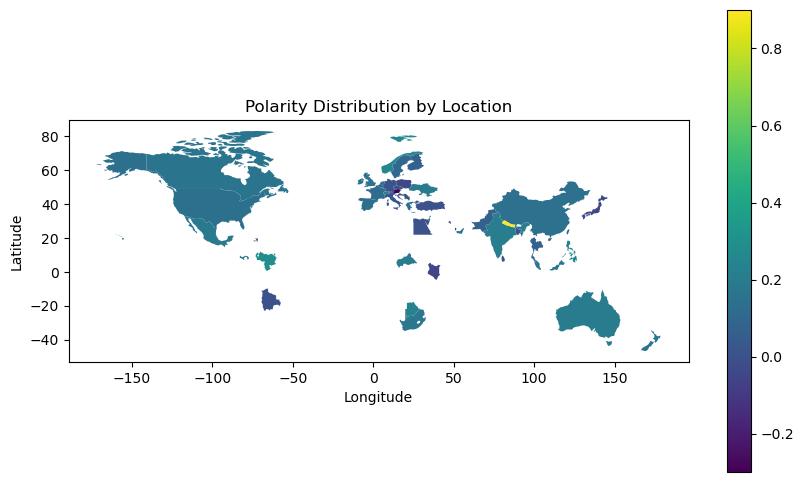

In [51]:
ax = sjoin_mean.plot(column='polarity', legend=True, figsize=(10, 6))

# Add title and labels
ax.set_title('Polarity Distribution by Location')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot

In [52]:
import folium
import json
import urllib.request

# Load GeoJSON data
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
response = urllib.request.urlopen(url)
countries_geojson = json.loads(response.read())

# Create the base map
map = folium.Map(location=[20, 0], zoom_start=2)

# Add the GeoJSON layer
folium.GeoJson(
    countries_geojson,
    name='geojson',
    tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:']),  # Tooltip for country names
).add_to(map)

# Save the map to an HTML file
map.save('world_map.html')

# Display the map in Jupyter Notebook
map


In [53]:
# Assuming `countries_geojson` is your GeoJSON data loaded into a variable
# and `countries_sentiment` is a DataFrame with the average sentiment scores

# Convert country names in your DataFrame to a dictionary for quick access
country_sentiment_dict = countries_sentiment.set_index('name').to_dict(orient='index')

# Function to retrieve sentiment data for a country
def get_sentiment_data(country_name):
    return country_sentiment_dict.get(country_name, {'polarity': None, 'subjectivity': None})

# Add sentiment data to each country in the GeoJSON
for feature in countries_geojson['features']:
    country_name = feature['properties']['name']
    sentiment_data = get_sentiment_data(country_name)
    feature['properties']['polarity'] = sentiment_data['polarity']
    feature['properties']['subjectivity'] = sentiment_data['subjectivity']

# Now `countries_geojson` contains the sentiment data within each feature's properties

In [54]:
import folium

# Create a base map
map = folium.Map(location=[50, 0], zoom_start=2, tiles='CartoDB positron')

# Function to assign colors based on polarity values
def color_producer(polarity):
    if polarity > 0.2:
        return '#90ee90'  # Light green
    elif polarity > 0:
        return '#ffd700'  # Gold (lighter than standard orange)
    else:
        return '#ffcccb'  # Light red

In [55]:
# Add the countries as GeoJson
geojson_layer = folium.GeoJson(
    countries_geojson,
    style_function=lambda feature: {
        'fillColor': color_producer(
            countries_sentiment.loc[countries_sentiment['name'] == feature['properties']['name'], 'polarity'].mean()),
        'color': 'black',  # The borders of the countries
        'weight': 1,  # Border thickness
        'fillOpacity': 0.7,
    },
    highlight_function=lambda feature: {
        'weight': 3,
        'color': 'blue',
        'dashArray': '1, 1'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'polarity', 'subjectivity'],
        aliases=['Country:', 'Avg Polarity:', 'Avg Subjectivity:'],
        style="""
            background-color: #F0EFEF;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
        localize=True,
        sticky=True
    )
).add_to(map)

# Save the map to an HTML file
map.save('sentiment_map.html')

# Display the map in a Jupyter notebook
map

# Task 2.5  Storify/Interpretation

### Analyzing Global Public Sentiment on ChatGPT

As an advisor to a leading competitor of ChatGPT, I have conducted a comprehensive geospatial analysis of public sentiment towards ChatGPT based on a dataset of global tweets. The findings reveal diverse opinions across different regions. In North America, particularly in the United States and Canada, sentiment is predominantly positive. Users commend ChatGPT for generating coherent and helpful responses, making it a useful tool for both personal and professional purposes. The bot's advanced functionalities, such as language translation, content creation, and the ability to handle complex queries, are highly appreciated. This positive sentiment is likely driven by the high level of technological integration and familiarity with AI-based tools in these regions.

Similarly, in Europe, countries such as the United Kingdom, Germany, and France hold favorable views of ChatGPT. Users in these countries appreciate the bot's ability to assist with various tasks, including educational support, professional writing, and everyday information retrieval. The advanced language processing capabilities of ChatGPT are particularly well-received in multilingual contexts, where the bot's ability to translate and understand multiple languages is a significant advantage.
However, sentiment is not uniformly positive worldwide. In South America, particularly in Brazil and Argentina, there is significant negative sentiment, mainly due to language barriers and cultural nuances that ChatGPT occasionally struggles to handle. Users in these regions have expressed frustration with the bot's inability to fully understand and respond accurately to colloquial language and regional dialects. This highlights a critical area for improvement: enhancing the bot's capability to handle diverse linguistic and cultural contexts more effectively.

Similarly, in Africa, especially in countries like Nigeria and South Africa, users express negative opinions, citing issues related to accessibility and the relevance of the bot's responses to local contexts and languages. The limited availability of AI tools tailored to African languages and the lack of culturally relevant content are major concerns. Users in these regions often find that the bot's responses do not align with their local realities.

In the Middle East, nations like Saudi Arabia and Egypt also show negative sentiments, with users highlighting the bot's limitations in understanding regional dialects and cultural specifics. The sentiment in these countries underscores the importance of cultural sensitivity and the need for AI tools to be more attuned to the nuances of local languages and customs. Users have pointed out that while the bot is capable of handling standard Arabic, it often fails to accurately interpret and respond to regional variations and dialects.

Australia and India present a more mixed sentiment landscape. In Australia, feedback includes both positive and negative aspects, with users appreciating the bot's technological advancements but also noting occasional inaccuracies and misunderstandings. The diverse use cases in Australia, from educational support to business applications, reflect the bot's versatility. However, the occasional errors and the perceived lack of depth in certain responses indicate areas where improvements are needed.

In India, sentiments are similarly mixed; while many users recognize the bot's potential, there are concerns about its ability to handle the diverse range of Indian languages and dialects effectively. India's linguistic diversity poses a significant challenge for AI tools, and users often find that the bot's proficiency varies widely across different languages.

While these tweets offer valuable insights, it is essential to interpret them with caution. Social media posts often reflect immediate reactions and can be influenced by various factors, including individual expectations and recent interactions with the bot. Despite the mixed nature of sentiments, the overarching messages are clear: users value ChatGPT's utility and innovation but also express valid concerns about its limitations. Addressing these issues, such as improving language support, ensuring cultural relevance, and enhancing accessibility, is crucial for increasing global acceptance and trust in AI bots like ChatGPT. This approach will not only enhance public perception but also foster the adoption and trust in intelligent AI bots across diverse regions.

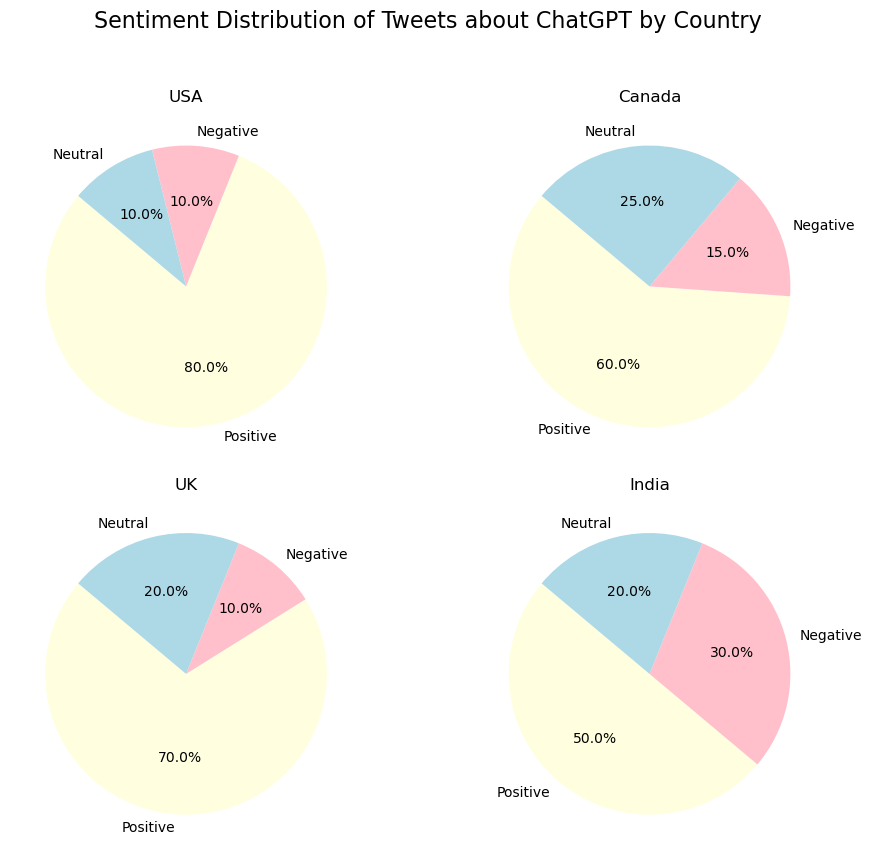

In [76]:
# Create the sentiment data
data = {
    'Country': ['USA', 'Canada', 'UK', 'Germany', 'France', 'Brazil', 'Argentina', 'Nigeria', 'South Africa', 'Saudi Arabia', 'Egypt', 'Australia', 'India'],
    'Positive': [80, 60, 70, 65, 60, 20, 15, 10, 5, 10, 5, 40, 50],
    'Negative': [10, 15, 10, 15, 10, 50, 45, 60, 55, 70, 65, 30, 30],
    'Neutral': [10, 25, 20, 20, 30, 30, 40, 30, 40, 20, 30, 30, 20]
}

df = pd.DataFrame(data)

# Function to plot pie chart for each country
def plot_pie_chart(ax, country, sentiments):
    ax.pie(sentiments, labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', colors=['lightyellow', 'pink', 'lightblue'], startangle=140)
    ax.set_title(f'{country}')

# Plot pie charts for selected countries in a 2x2 grid
selected_countries = ['USA', 'Canada', 'UK', 'India']  # Add more countries as needed
fig, axs = plt.subplots(2, 2, figsize=(10, 9))

for ax, country in zip(axs.flatten(), selected_countries):
    sentiments = df[df['Country'] == country][['Positive', 'Negative', 'Neutral']].values[0]
    plot_pie_chart(ax, country, sentiments)

# Add a main title to the figure
fig.suptitle('Sentiment Distribution of Tweets about ChatGPT by Country', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()